In [1]:
from IPython.display import display, HTML
import scipy.constants as sc
from scipy.optimize import fsolve
from ipywidgets import interact, widgets
%matplotlib notebook

import numpy as np
import cmath
import matplotlib.pyplot as plt
import scipy.constants as sc
plt.rcParams.update({
    "text.usetex": True,
    'text.latex.preamble': r"\usepackage{amsmath} \boldmath"
})
import os
import h5py

print(os.getpid())
%cd ../../

12535
/media/work/docs/codes/QuCF/scripts-py


In [2]:
import pylib.mix as mix
import pylib.qsvt_angles as qsvt_a

F_x_gauss = lambda x, param, coef_norm: coef_norm * x * np.exp(-x**2/(2*param**2)) 

path_root_ = "/media/work/docs/codes/QuCF/scripts-py/jupyter-notebooks/QSVT-angles/xgaussian/"
path_coefs_      = path_root_ + "xgaussian-coefs/"
path_angels_hdf_ = path_root_ + "xgaussian-angles/"

In [3]:
# ------------------------------------------------------------
# --- Read polynomial coefficients from the .hdf5 file ---
# ------------------------------------------------------------
mix.reload_module(mix)
mix.reload_module(qsvt_a)

# *** CHOOSE the case ***
filename_coefs = "xgaussian_0.200000_11"

data = qsvt_a.read_Fourier_coefs(path_coefs_, filename_coefs)

when simulated:  08-15-2023 16:21:10

function-type: 		xgaussian
function-parity: 		1
param: 			0.200000
absolute error: 	9.714e-12
norm. factor: 		9.800e-01
number of coefficients: 20


<IPython.core.display.Javascript object>


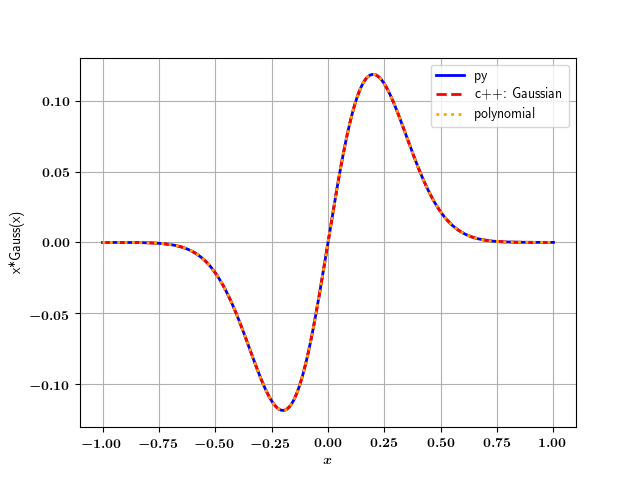

In [4]:
# --------------------------------------------------------
# --- Plot the function restored from the coefficients ---
# --------------------------------------------------------
mix.reload_module(mix)
mix.reload_module(qsvt_a)

fig = plt.figure()
ax = fig.add_subplot(111)

ax.plot(data["x"], F_x_gauss(data["x"], data["param"], data["factor_norm"]), 
        color='b',  linewidth = 2, linestyle='-', label = "py")
ax.plot(data["x"], data["orig_func"], color='r',       linewidth = 2, linestyle='--', label = "c++: Gaussian")
ax.plot(data["x"], data["ref_funct"], color='orange',  linewidth = 2, linestyle=':',  label = "polynomial")

plt.xlabel('$x$')
plt.ylabel("x*Gauss(x)")
ax.legend()
plt.grid(True)
plt.show()

In [5]:
# ---------------------------------------------------------------------------
# --- Store the results to the .mat file to compute QSVT angles in matlab ---
# ---------------------------------------------------------------------------
mix.reload_module(mix)
mix.reload_module(qsvt_a)

qsvt_a.save_coef_mat(path_coefs_, filename_coefs, data)

file name:  /media/work/docs/codes/QuCF/scripts-py/jupyter-notebooks/QSVT-angles/xgaussian/xgaussian-coefs/xgaussian_0.200000_11.mat


In [16]:
# ---------------------------------------------------------------------
# --- Write angles computed in .matlab to an .hdf5 file ---
# ---------------------------------------------------------------------

# *** CHOOSE the .txt file with angles to read ***
filename_angels = "xgaussian_mu0.2_eps11"


# ***
final_old_filename = path_angels_hdf_ + filename_angels + ".angles"
final_new_filename = path_angels_hdf_ + filename_angels + ".hdf5"

# --- read the .angles (text) file ---
print("read angles from:\n " + final_old_filename)
with open(final_old_filename) as f:
    function_type_res    = "{:s}".format(f.readline())[:-1]
    rescaling_factor_res = float(f.readline()[:-1])
    parity_res           = int(f.readline()[:-1])
    param_res            = float(f.readline()[:-1]) 
    eps_res              = float(f.readline()[:-1]) 
    Na_res               = int(f.readline()[:-1]) 
    angles_res = np.zeros(Na_res)
    for ii in range(Na_res):
        angles_res[ii] = float(f.readline())

print()
print("function type: \t\t{:s}".format(function_type_res))    
print("rescaling factor: \t{:0.3f}".format(rescaling_factor_res))
print("parity: \t\t{:d}".format(parity_res))
print("parameter: \t\t{:0.3e}".format(param_res))
print("error: \t\t\t{:0.3e}".format(eps_res))
print("N-angles: \t\t{:d}".format(Na_res))
print()       

# --- write the .hdf5 file ---
print("write angles to:\n " + final_new_filename)
with h5py.File(final_new_filename, "w") as f:
    grp = f.create_group("basic")
    
    grp.create_dataset('polynomial_type',  data=function_type_res)
    grp.create_dataset('rescaling_factor', data=rescaling_factor_res)
    grp.create_dataset('parity',           data=parity_res)
    grp.create_dataset('par',              data=param_res)
    grp.create_dataset('eps',              data=eps_res)
    
    grp = f.create_group("angles")
    if parity_res == 1:
        grp.create_dataset('odd', data=angles_res)
    if parity_res == 0:
        grp.create_dataset('even', data=angles_res)
        
del filename_angels, final_old_filename, final_new_filename

read angles from:
 /media/work/docs/codes/QuCF/scripts-py/jupyter-notebooks/QSVT-angles/xgaussian/xgaussian-angles/xgaussian_mu0.2_eps11.angles

function type: 		xgaussian
rescaling factor: 	0.980
parity: 		1
parameter: 		2.000e-01
error: 			9.833e-12
N-angles: 		40

write angles to:
 /media/work/docs/codes/QuCF/scripts-py/jupyter-notebooks/QSVT-angles/xgaussian/xgaussian-angles/xgaussian_mu0.2_eps11.hdf5
